In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [3]:
mnist_train = pd.read_csv('../datasets/mnist_train.csv')
mnist_test = pd.read_csv('../datasets/mnist_test.csv')

In [4]:
x_train_raw = torch.tensor(mnist_train.iloc[:, 1:].values, dtype=torch.float32)
x_test_raw = torch.tensor(mnist_test.iloc[:, 1:].values, dtype=torch.float32)
x_train = x_train_raw / 255
x_test = x_test_raw / 255

In [5]:
y_train_raw = torch.tensor(mnist_train.iloc[:, 0].values, dtype=torch.int64).view(-1, 1)
y_test_raw = torch.tensor(mnist_test.iloc[:, 0].values, dtype=torch.int64).view(-1, 1)

In [6]:
def one_hot_encode(y, num_classes):
  return torch.eye(num_classes)[y].view(y.shape[0], num_classes)

In [7]:
y_train = one_hot_encode(y_train_raw, num_classes=10)
y_test = one_hot_encode(y_test_raw, num_classes=10)

In [8]:
n_training_samples = x_train.shape[0]
n_test_samples = x_test.shape[0]
n_features = x_train.shape[1]
n_classes = y_train.shape[1]
print(f"Training samples: {n_training_samples}")
print(f"Test samples: {n_test_samples}")
print(f"Features: {n_features}")
print(f"Classes: {n_classes}")

Training samples: 60000
Test samples: 10000
Features: 784
Classes: 10


In [ ]:
%cd .. 
from mydl.architecture import * # import all the classes and functions from the architecture module
from mydl.layers import * # import all the classes and functions from the layers module
from mydl.losses import * # import all the classes and functions from the losses module
from mydl.optimizers import * # import all the classes and functions from the optimizers module
%cd notebooks

/Users/orlando/GitHub/SCUDO-MMinDL
[Errno 2] No such file or directory: 'notebooks # change back to the notebooks directory'
/Users/orlando/GitHub/SCUDO-MMinDL


/Users/orlando/GitHub/SCUDO-MMinDL/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/Users/orlando/GitHub/SCUDO-MMinDL/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


### Logistic Regression with `mydl` library

Let us implement logistic regression with our library.

In [10]:
model = Sequential([Linear(n_features,n_classes)])
loss = CrossEntropy()

In [11]:
optimizer = GD(learning_rate=1)
losses_train = model.train(x_train, y_train, loss, optimizer, n_epochs=10, batch_size=32)

Training the network...
Training complete.


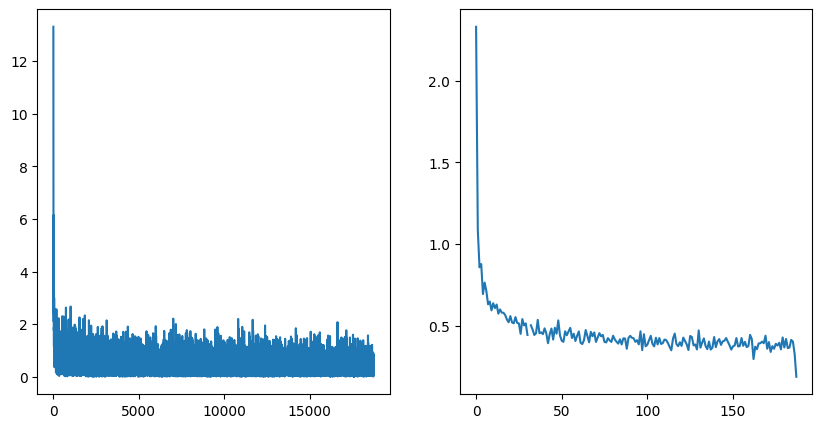

In [12]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(losses_train)
ax2 = fig.add_subplot(122)
averaged_losses_train = [sum(losses_train[i:i+100])/100 for i in range(0, len(losses_train), 100)]
ax2.plot(averaged_losses_train)

In [13]:
q = model.forward(x_test)
label_pred = torch.argmax(q, dim=1)
label_true = torch.argmax(y_test, dim=1)
p_correct_predictions = ( torch.sum(label_pred == label_true) / n_test_samples ).item()
print(f'Correct predictions: {p_correct_predictions*100:.4f}%')

Correct predictions: 90.6600%


### A deeper model

In [14]:
model = Sequential([Linear(n_features, 128),
                    Sigmoid(),
                    Linear(128, 64),
                    Sigmoid(),
                    Linear(64, 32),
                    Sigmoid(),
                    Linear(32, n_classes)])
loss = CrossEntropy()

In [18]:
optimizer = GD(learning_rate=1)
losses_train = model.train(x_train, y_train, loss, optimizer, n_epochs=10, batch_size=32)

Training the network...
Training complete.


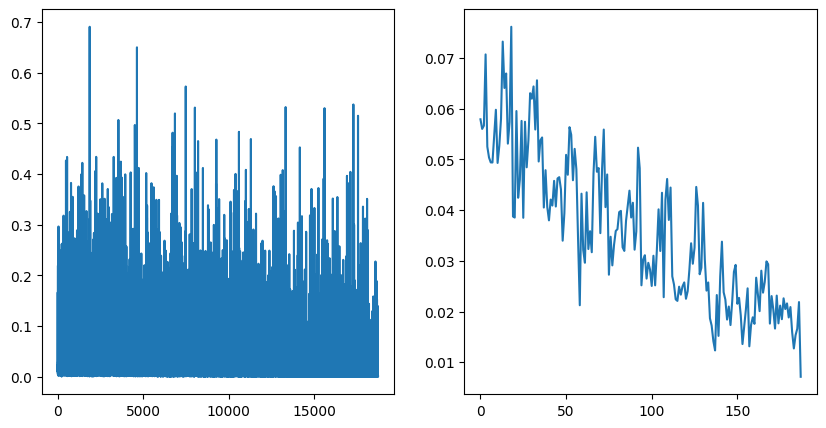

In [21]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(losses_train)
ax2 = fig.add_subplot(122)
averaged_losses_train = [sum(losses_train[i:i+100])/100 for i in range(0, len(losses_train), 100)]
ax2.plot(averaged_losses_train)

In [22]:
q = model.forward(x_test)
label_pred = torch.argmax(q, dim=1)
label_true = torch.argmax(y_test, dim=1)
p_correct_predictions = ( torch.sum(label_pred == label_true) / n_test_samples ).item()
print(f'Correct predictions: {p_correct_predictions*100:.4f}%')

Correct predictions: 95.8900%
